In [1]:
# Importing libraries
import pandas as pd
from pathlib import Path
import csv
from config import api_key
import requests
from pprint import pprint
import random


In [2]:
csv_path = Path("../Resources/global air pollution dataset.csv")
global_df = pd.read_csv(csv_path)
global_df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [3]:
global_df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

In [4]:
NorthAmerica_df = global_df.loc[global_df['Country'].isin(['United States of America', 'Canada', 'Mexico'])]
NorthAmerica_df.head()
NorthAmerica_df.count()

Country               3601
City                  3601
AQI Value             3601
AQI Category          3601
CO AQI Value          3601
CO AQI Category       3601
Ozone AQI Value       3601
Ozone AQI Category    3601
NO2 AQI Value         3601
NO2 AQI Category      3601
PM2.5 AQI Value       3601
PM2.5 AQI Category    3601
dtype: int64

In [5]:
unique_cities = NorthAmerica_df[['Country', 'City']].drop_duplicates().reset_index(drop=True)
cities_list = unique_cities['City']
cities_list.to_csv('../Resources/cities_list.csv')
unique_cities.to_csv('../Resources/citiesandcountry_list.csv')

# Making a list of cities. This is the entire list of 3601 countries 
list_cities = cities_list.to_list()

# Randomized list of 500 cities. This is probably better for plotting and to avoid hitting API limit
random_cities = random.sample(list_cities,50) # change to 500 or any number you want

# Shortened list of cities. Use this for testing code to avoid hitting API limit
short_cities = cities_list.head(3).tolist()


In [6]:
random_cities

['Trussville',
 'Texcoco',
 'Piedmont',
 'Durango',
 'Oconomowoc',
 'Hidalgo',
 'Tepatitlan',
 'Garland',
 'Beach Park',
 'Belvidere',
 'Saint Paul',
 'Roy',
 'Naranjos',
 'Punta Gorda',
 'Greensboro',
 'Fuquay Varina',
 'Belton',
 'Mustang',
 'Olive Branch',
 'Cosamaloapan',
 'Lake Elsinore',
 'Schenectady',
 'Holden',
 'Ewing',
 'Hayden',
 'Hackensack',
 'Rossville',
 'Vega Baja',
 'Naucalpan',
 'Steger',
 'South Daytona',
 'Glen Rock',
 'Winfield',
 'Corcoran',
 'Xoxtla',
 'North Las Vegas',
 'Cleburne',
 'San Anselmo',
 'Norfolk',
 'Jimenez',
 'Apple Valley',
 'Barrie',
 'Alliston',
 'Peoria',
 'Charlotte',
 'New Milford',
 'Oakville',
 'Millbury',
 'Lyons',
 'Tuxtla Gutierrez']

In [7]:
# Acessing the open weather API to get lattitude and longitude values

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Making API calls
lat = []
lon = []

# loop through list of cities
for city in random_cities:
    #print (city)
    
    response = requests.get(query_url + city).json()
    try:
        #print (response)
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
    except Exception as e:
        print(f'city not found or {e}')
        pass

city not found or 'coord'
city not found or 'coord'
city not found or 'coord'


In [8]:
# Accessing the open weather API to get air pollution values

air_url = 'http://api.openweathermap.org/data/2.5/air_pollution?' # current air pollution values

coord = [] # latitude and longitude coordinates
aqi = [] # air quality index
co = [] # Concentration of CO (Carbon monoxide), μg/m3
nh3 = [] # Concentration of NO (Nitrogen monoxide), μg/m3
no = [] # Сoncentration of NO2 (Nitrogen dioxide), μg/m3
no2 = [] # Сoncentration of O3 (Ozone), μg/m3
o3 = [] # Сoncentration of SO2 (Sulphur dioxide), μg/m3
pm10 = [] # Сoncentration of PM2.5 (Fine particles matter),
pm2_5 = [] # Сoncentration of PM10 (Coarse particulate matter), μg/m3
so2 = [] # Сoncentration of NH3 (Ammonia), μg/m3


for lt,ln in zip(lat,lon):
    response = requests.get(f'{air_url}lat={lt}&lon={ln}&appid={api_key}').json()
    #pprint (response)
    try:
        coord.append(response['coord'])
        aqi.append(response['list'][0]['main']['aqi'])
        co.append(response['list'][0]['components']['co'])
        nh3.append(response['list'][0]['components']['nh3'])
        no.append(response['list'][0]['components']['no'])
        no2.append(response['list'][0]['components']['no2'])
        o3.append(response['list'][0]['components']['o3'])
        pm10.append(response['list'][0]['components']['pm10'])
        pm2_5.append(response['list'][0]['components']['pm2_5'])
        so2.append(response['list'][0]['components']['so2'])
    except Exception as e:
        print (f'failed to get values for lat:{lt} and lon:{ln}. Error is: {e}')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

top 5 cities with the highest PM2.5 levels using Matplotlib - North America

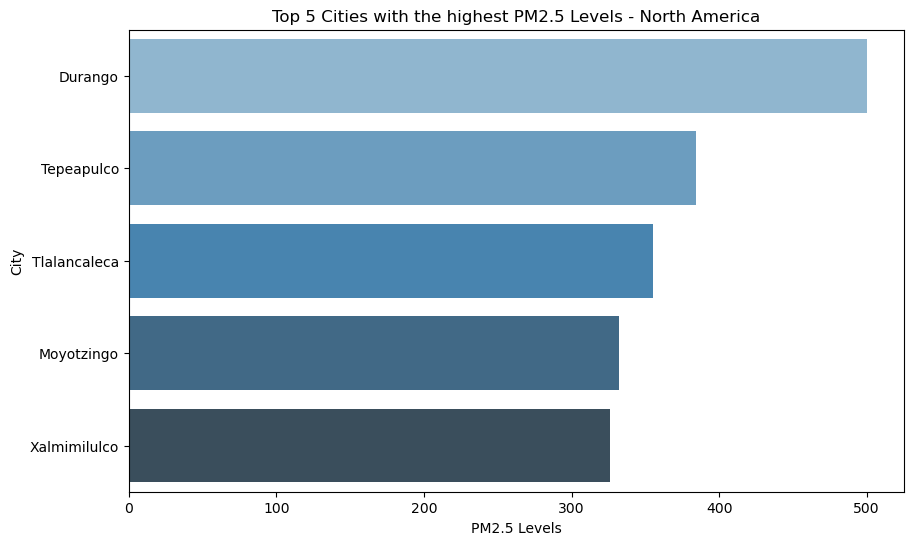

In [26]:
# Sort the data by PM2.5 levels and select the top 5 cities - Highest PM2.5 Level
top_5_pm25 = NorthAmerica_df.sort_values(by='PM2.5 AQI Value', ascending=False).head()
top_5_pm25
# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='PM2.5 AQI Value', y='City', data=top_5_pm25, palette='Blues_d')
plt.title('Top 5 Cities with the highest PM2.5 Levels - North America')
plt.xlabel('PM2.5 Levels')
plt.ylabel('City')
plt.show()


In [11]:
# Create a DataFrame
map_data = pd.DataFrame({
    'Lat': lat,
    'Lon': lon,
    'AQI': aqi,
    'CO': co,
    'NH3': nh3,
    'NO2': no2,
    'O3': o3,
    'PM10': pm10,
    'PM2.5': pm2_5,
    'SO2': so2})



map_data.head()

,Lat,Lon,AQI,CO,NH3,NO2,O3,PM10,PM2.5,SO2
0,33.6198,-86.6089,2,230.31,2.47,4.07,80.82,2.16,1.33,1.01
1,19.5167,-98.8833,2,236.99,1.55,7.88,75.82,9.86,7.52,4.47
2,37.8244,-122.2316,2,223.64,0.34,4.97,82.25,3.33,1.63,1.40
3,24.8333,-104.8333,3,181.91,0.67,0.33,101.57,12.98,7.91,1.39
4,43.1117,-88.4993,1,267.03,1.85,8.91,53.64,3.39,2.77,0.45


In [12]:
# Sort the data by AQI in descending order to get the highest AQI values first
top_5_cities = map_data.sort_values(by='AQI', ascending=False).head(5)

# Display the top 5 cities with the highest AQI
print(top_5_cities)


        Lat       Lon  AQI      CO   NH3    NO2      O3   PM10  PM2.5   SO2
37  34.5008 -117.1859    4  253.68  0.44   3.00  175.95  36.71  28.12  3.16
45  41.8134  -87.8181    3  634.19  5.19  74.03    0.11  15.70  10.85  3.67
3   24.8333 -104.8333    3  181.91  0.67   0.33  101.57  12.98   7.91  1.39
18  33.6681 -117.3273    3  240.33  0.47   5.27  108.72  12.15   8.14  2.21
27  41.4700  -87.6364    3  614.17  3.23  81.57    2.62  23.39  12.16  3.70


In [13]:
# Sort the data by AQI in ascending order to get the lowest AQI values first
bottom_5_cities = map_data.sort_values(by='AQI', ascending=True).head(5)

# Display the top 5 cities with the lowest AQI
print(bottom_5_cities)


        Lat      Lon  AQI      CO   NH3    NO2     O3  PM10  PM2.5   SO2
46  16.7500 -93.1167    1  243.66  0.44   2.42  45.42  4.04   3.81  0.47
20  42.3518 -71.8634    1  230.31  0.28   4.93  56.51  0.91   0.50  0.04
14  38.8120 -94.5319    1  303.75  1.38  20.91  55.79  4.80   4.05  6.97
35  42.1668 -71.2495    1  313.76  0.98  17.65  38.62  4.65   2.23  0.24
25  18.4444 -66.3877    1  213.62  0.00   0.26  36.48  1.08   0.50  0.18


In [14]:
pip install opencage


Note: you may need to restart the kernel to use updated packages.


In [15]:
from opencage.geocoder import OpenCageGeocode

# Your OpenCage API key
api_key = "bb982ace21af4d06a54676ea96868918"
geocoder = OpenCageGeocode(api_key)

def get_city(lat, lon):
    try:
        result = geocoder.reverse_geocode(lat, lon)
        if result and len(result):
            return result[0]['components'].get('city', '') or result[0]['components'].get('town', '') or result[0]['components'].get('village', 'Unknown')
        else:
            return "Unknown"
    except Exception as e:
        print(f"Error: {e}")
        return "Unknown"

# Apply the function to each row in the DataFrame
map_data['City'] = map_data.apply(lambda row: get_city(row['Lat'], row['Lon']), axis=1)


In [16]:
top_5_cities['City'] = top_5_cities.apply(lambda row: get_city(row['Lat'], row['Lon']), axis=1)
top_5_cities


,Lat,Lon,AQI,CO,NH3,NO2,O3,PM10,PM2.5,SO2,City
37,34.5008,-117.1859,4,253.68,0.44,3.00,175.95,36.71,28.12,3.16,Apple Valley
45,41.8134,-87.8181,3,634.19,5.19,74.03,0.11,15.70,10.85,3.67,Lyons
3,24.8333,-104.8333,3,181.91,0.67,0.33,101.57,12.98,7.91,1.39,Fuente del Llano
18,33.6681,-117.3273,3,240.33,0.47,5.27,108.72,12.15,8.14,2.21,Lake Elsinore
27,41.4700,-87.6364,3,614.17,3.23,81.57,2.62,23.39,12.16,3.70,Steger


In [17]:
bottom_5_cities['City'] = bottom_5_cities.apply(lambda row: get_city(row['Lat'], row['Lon']), axis=1)
bottom_5_cities


,Lat,Lon,AQI,CO,NH3,NO2,O3,PM10,PM2.5,SO2,City
46,16.7500,-93.1167,1,243.66,0.44,2.42,45.42,4.04,3.81,0.47,Tuxtla Gutiérrez
20,42.3518,-71.8634,1,230.31,0.28,4.93,56.51,0.91,0.50,0.04,Holden
14,38.8120,-94.5319,1,303.75,1.38,20.91,55.79,4.80,4.05,6.97,Belton
35,42.1668,-71.2495,1,313.76,0.98,17.65,38.62,4.65,2.23,0.24,Walpole
25,18.4444,-66.3877,1,213.62,0.00,0.26,36.48,1.08,0.50,0.18,Vega Baja


In [18]:
import requests
import time

# OpenWeatherAPI Key
api_key = "f10265912a80ed3b753c7e38462d7a17" 



# Function to get coordinates using OpenWeatherAPI
def get_coordinates(city_name):
    url = f"http://api.openweathermap.org/geo/1.0/direct?q={city_name}&limit=1&appid={api_key}"
    try:
        response = requests.get(url)
        data = response.json()
        print(data)  # Check what data is returned
        if data:
            latitude = data[0]['lat']
            longitude = data[0]['lon']
            print(f"Found {city_name}: {latitude}, {longitude}")
            return latitude, longitude
        else:
            print(f"Could not find location for {city_name}")
            return None
    except Exception as e:
        print(f"Error retrieving coordinates for {city_name}: {e}")
        return None

# Apply the function to get latitude and longitude for each city
top_5_pm25['Coordinates'] = top_5_pm25['City'].apply(get_coordinates)
top_5_pm25['Latitude'] = top_5_pm25['Coordinates'].apply(lambda x: x[0] if x else None)
top_5_pm25['Longitude'] = top_5_pm25['Coordinates'].apply(lambda x: x[1] if x else None)

# Display the updated DataFrame with coordinates
print(top_5_pm25)


[{'name': 'Durango', 'local_names': {'eu': 'Durango', 'ru': 'Дуранго'}, 'lat': 43.1707065, 'lon': -2.6334897, 'country': 'ES', 'state': 'Autonomous Community of the Basque Country'}]
Found Durango: 43.1707065, -2.6334897
[{'name': 'Tepeapulco', 'lat': 19.7875962, 'lon': -98.5522855, 'country': 'MX', 'state': 'Hidalgo'}]
Found Tepeapulco: 19.7875962, -98.5522855
[{'name': 'San Matías Tlalancaleca', 'lat': 19.3243081, 'lon': -98.4981701, 'country': 'MX', 'state': 'Puebla'}]
Found Tlalancaleca: 19.3243081, -98.4981701
[{'name': 'Santa María Moyotzingo', 'lat': 19.245278, 'lon': -98.404722, 'country': 'MX', 'state': 'Puebla'}]
Found Moyotzingo: 19.245278, -98.404722
[{'name': 'Santa Ana Xalmimilulco', 'lat': 19.2111351, 'lon': -98.3807, 'country': 'MX', 'state': 'Puebla'}]
Found Xalmimilulco: 19.2111351, -98.3807
                        Country          City  AQI Value AQI Category  \
5156   United States of America       Durango        500    Hazardous   
8547                     Mexico  

In [19]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [20]:
import folium

# Create a map centered at the average coordinates of all cities
center_lat = top_5_pm25['Latitude'].mean()
center_lon = top_5_pm25['Longitude'].mean()

city_map = folium.Map(location=[center_lat, center_lon], zoom_start=5)

# Add markers for each city
for index, row in top_5_pm25.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['City']}: PM2.5 AQI Value = {row['PM2.5 AQI Value']}",
        icon=folium.Icon(color='red' if row['PM2.5 AQI Value'] > 100 else 'green')  # Red for high pollution
    ).add_to(city_map)

# Display the map
city_map.save('top_5_cities_map.html')
city_map


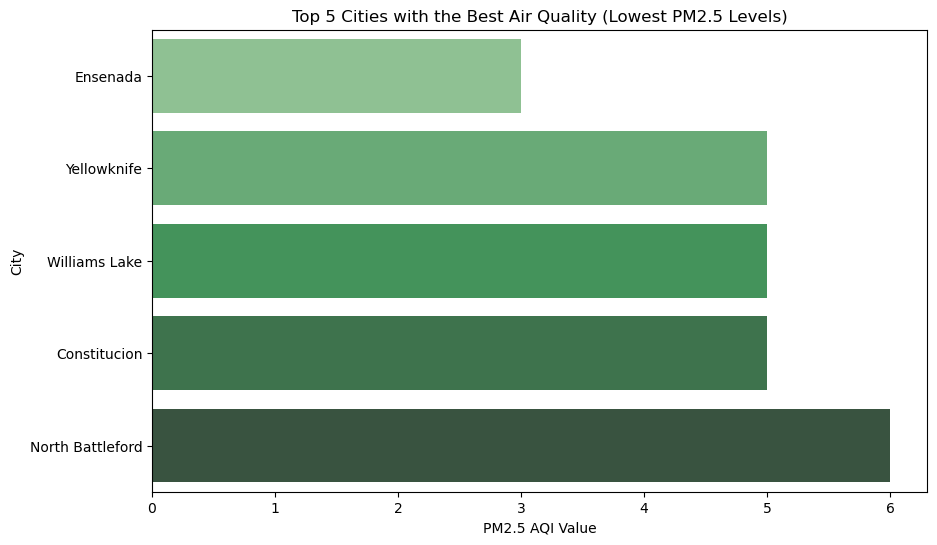

In [21]:
# Sort the data by PM2.5 AQI Value and select the top 5 cities with the lowest levels
best_5_pm25 = NorthAmerica_df.sort_values(by='PM2.5 AQI Value', ascending=True).head(5)

# Plot a horizontal bar chart for best air quality cities
plt.figure(figsize=(10, 6))
sns.barplot(x='PM2.5 AQI Value', y='City', data=best_5_pm25, palette='Greens_d')
plt.title('Top 5 Cities with the Best Air Quality (Lowest PM2.5 Levels)')
plt.xlabel('PM2.5 AQI Value')
plt.ylabel('City')
plt.show()

In [22]:
# Function to get coordinates using OpenWeatherAPI
def get_coordinates(city_name):
    url = f"http://api.openweathermap.org/geo/1.0/direct?q={city_name}&limit=1&appid={api_key}"
    try:
        response = requests.get(url)
        data = response.json()
        print(data)  # Check what data is returned
        if data:
            latitude = data[0]['lat']
            longitude = data[0]['lon']
            print(f"Found {city_name}: {latitude}, {longitude}")
            return latitude, longitude
        else:
            print(f"Could not find location for {city_name}")
            return None
    except Exception as e:
        print(f"Error retrieving coordinates for {city_name}: {e}")
        return None

# Apply the function to get latitude and longitude for each city
best_5_pm25['Coordinates'] = top_5_pm25['City'].apply(get_coordinates)
best_5_pm25['Latitude'] = top_5_pm25['Coordinates'].apply(lambda x: x[0] if x else None)
best_5_pm25['Longitude'] = top_5_pm25['Coordinates'].apply(lambda x: x[1] if x else None)

# Display the updated DataFrame with coordinates
print(top_5_pm25)

[{'name': 'Durango', 'local_names': {'eu': 'Durango', 'ru': 'Дуранго'}, 'lat': 43.1707065, 'lon': -2.6334897, 'country': 'ES', 'state': 'Autonomous Community of the Basque Country'}]
Found Durango: 43.1707065, -2.6334897
[{'name': 'Tepeapulco', 'lat': 19.7875962, 'lon': -98.5522855, 'country': 'MX', 'state': 'Hidalgo'}]
Found Tepeapulco: 19.7875962, -98.5522855
[{'name': 'San Matías Tlalancaleca', 'lat': 19.3243081, 'lon': -98.4981701, 'country': 'MX', 'state': 'Puebla'}]
Found Tlalancaleca: 19.3243081, -98.4981701
[{'name': 'Santa María Moyotzingo', 'lat': 19.245278, 'lon': -98.404722, 'country': 'MX', 'state': 'Puebla'}]
Found Moyotzingo: 19.245278, -98.404722
[{'name': 'Santa Ana Xalmimilulco', 'lat': 19.2111351, 'lon': -98.3807, 'country': 'MX', 'state': 'Puebla'}]
Found Xalmimilulco: 19.2111351, -98.3807
                        Country          City  AQI Value AQI Category  \
5156   United States of America       Durango        500    Hazardous   
8547                     Mexico  

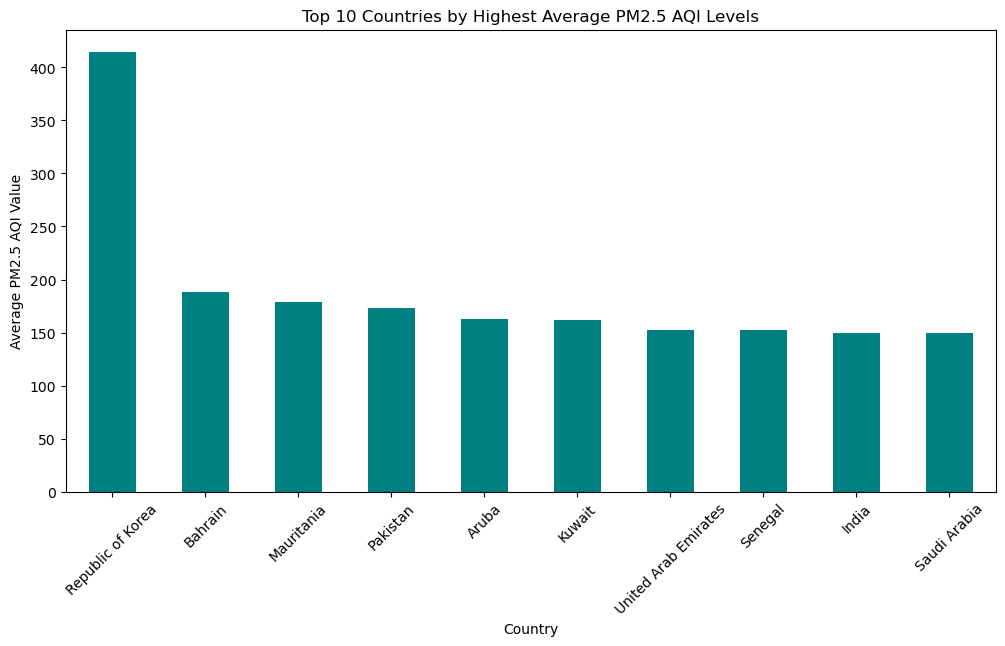

In [23]:
# Group by country and calculate the mean PM2.5 AQI Value
pm25_by_country = global_df.groupby('Country')['PM2.5 AQI Value'].mean().sort_values(ascending=False).head(10)

# Create a bar plot to show the average PM2.5 levels by country
plt.figure(figsize=(12, 6))
pm25_by_country.plot(kind='bar', color='teal')
plt.xlabel('Country')
plt.ylabel('Average PM2.5 AQI Value')
plt.title('Top 10 Countries by Highest Average PM2.5 AQI Levels')
plt.xticks(rotation=45)
plt.show()

In [25]:
import plotly.express as px
import pandas as pd

# Define a list of available pollution indicators
pollution_indicators = ['AQI', 'CO', 'NH3', 'NO2', 'O3', 'PM10', 'PM2.5', 'SO2']

# Create the initial figure (using AQI by default)
fig = px.bar(map_data, x='City', y='AQI', title="Air Quality Indicators by City")

# Update the layout to include a dropdown
fig.update_layout(
    updatemenus=[
        {
            'buttons': [
                {'method': 'update', 'label': indicator, 'args': [{'y': [map_data[indicator]]}, {'title': f"{indicator} by City"}]} 
                for indicator in pollution_indicators
            ],
            'direction': 'down',
            'showactive': True,
        }
    ]
)

# Show the figure
fig.show()
